This notebook shows how we can perform linear regression on a dataset using backpropagation and optimization.

We generate a noisy dataset:

In [1]:
import numpy as np

np.random.seed(0)
n_samples = 1000
X = np.random.rand(n_samples)*10
X = np.expand_dims(X, axis=-1)
noise = np.random.randn(n_samples)*4.0
noise = np.expand_dims(noise, axis=-1)
ground_truth = 5 * X + 3
y = ground_truth + noise

X and y are the features and the label, respectively. We can look at the format of the data:

In [2]:
print(type(X))
print(type(y))

print(X.shape)
print(y.shape)

print(X.dtype)
print(y.dtype)

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
(1000, 1)
(1000, 1)
float64
float64


As you can see, X and y are numpy arrays. We generated 1000 samples, with one feature per sample, and y are the corresponding labels for each sample.

## Plotting the data

When working with a dataset, it is always helpful to visualize the data that we are working with, in order to be able to check if our results are meaningful. We will use matplotlib to plot the data.

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

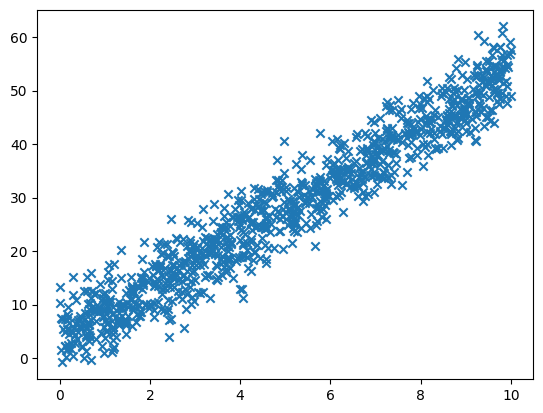

In [4]:
plt.figure()
plt.scatter(X, y, marker="x")
plt.show()

## Performing linear regression with backpropagation

In this notebook we are going to:
 - Implement the gradient using the [torch.nn.MSELoss](https://pytorch.org/docs/stable/nn.html#mseloss) class for the loss calculation. Also, use a pytorch optimizer such as [torch.optim.SGD](https://pytorch.org/docs/stable/optim.html#torch.optim.SGD) instead of updating the weights manually. Using an optimizer is done in the following way:
 
```python
optimizer = optim.SGD([weights], lr=my_learning_rate)
   
# in the optimization loop:
optim.zero_grad() # equivalent to weights.grad.zero_()
# loss calculation here, then
optim.step() # equivalent to weights -= learning_rate*weights.grad
```

 In models with many weight tensors, using an optimizer is way easier than updating them all individually. Also, using different optimizers is as easy as using a different `torch.optim` class.

## Solution

In [5]:
import torch

X_ = np.c_[X, np.ones((X.shape[0]))]

num_samples = X_.shape[0]
num_features = X_.shape[1]
X = torch.as_tensor(X_)
y = torch.as_tensor(y)


In [6]:
def generate_weights(num_features):
    np.random.seed(42) # this is just so that we all generate the same weights and thus get the same results
    return (np.random.rand(num_features).reshape(-1, 1) * 2 - 1) / np.sqrt(num_features)

weights = generate_weights(num_features)
print(weights.shape)
weights = torch.tensor(weights, requires_grad=True)

(2, 1)


In [10]:
it = 1000
lr = 0.01

optimizer = torch.optim.SGD([weights], lr=lr)
for i in range(1000):
    
    predictions = X @ weights
    loss = torch.nn.MSELoss()
    output = loss(predictions, y)
    output.backward()
    optimizer.step() # equivalent to weights -= learning_rate*weights.grad
    optimizer.zero_grad() # equivalent to weights.grad.zero_()
    if i % 100 == 0:
        print(output.item())
    
    

14.922992393258408
14.922992392175507
14.922992391778019
14.922992391632118
14.922992391578559
14.922992391558903
14.922992391551686
14.922992391549036
14.922992391548066
14.922992391547707


In [11]:
print(weights)

tensor([[4.9612],
        [3.3087]], dtype=torch.float64, requires_grad=True)


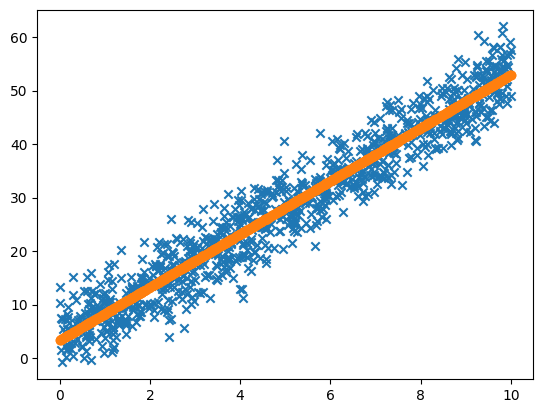

In [12]:
plt.figure()
plt.scatter(X[:,0], y, marker="x")
with torch.no_grad():
    plt.scatter(X[:,0], predictions, marker = "o")
plt.show()